 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [312]:
# Initial imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [265]:
# Reading whale returns
whale_df = pd.read_csv(
    Path('Resources/whale_returns.csv'), index_col='Date',
    parse_dates=True, infer_datetime_format=True
)
print(whale_df.shape)
whale_df.head(3)

(1060, 4)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213


In [266]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [267]:
# Drop nulls
whale_df.dropna(inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [268]:
# Reading algorithmic returns
algo_df = pd.read_csv(
    Path('Resources/algo_returns.csv'), index_col='Date',
    parse_dates=True, infer_datetime_format=True
)
print(algo_df.shape)
algo_df.head(3)

(1241, 2)


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN


In [269]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [270]:
# Drop nulls
algo_df.dropna(inplace=True)

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [271]:
# Reading S&P TSX 60 Closing Prices
sp_df = pd.read_csv(
    Path('Resources/sp_tsx_history.csv'), index_col='Date',
    parse_dates=True, infer_datetime_format=True
)
print(sp_df.shape)
sp_df.head(3)

(1818, 1)


,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"


In [272]:
# Check Data Types
sp_df.dtypes

Close    object
dtype: object

In [273]:
# Fix Data Types
sp_df['Close'] = sp_df['Close'].str.replace('$', '').str.replace(',', '').astype(float)

In [274]:
# Calculate Daily Returns
sp_df['Close'] = sp_df['Close'].pct_change()
sp_df.head(3)

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563


In [275]:
# Drop nulls
sp_df.dropna(inplace=True)

In [276]:
# Rename `Close` Column to be specific to this portfolio.
sp_df.rename(columns={'Close': 'S&P TSX'}, inplace=True)
sp_df.head(3)

,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [277]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
df = pd.concat([whale_df, algo_df, sp_df], join='inner', axis=1)
print(df.shape)
df.sort_index(inplace=True)
df.head()

(1029, 7)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

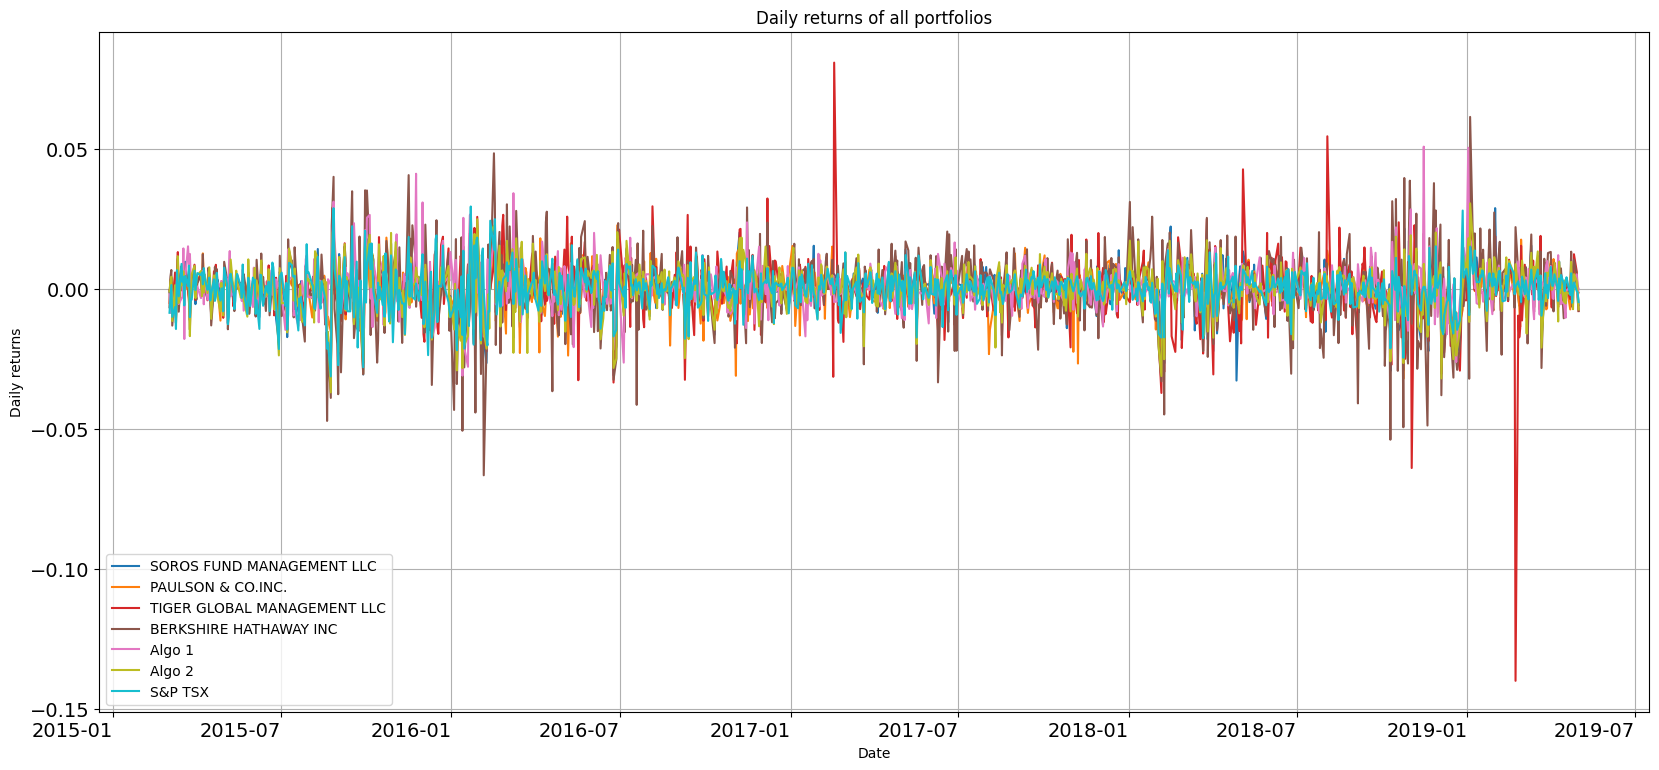

In [278]:
# Plot daily returns of all portfolios

df.plot(
    figsize=(20, 10), grid=True,
    xlabel='Date', ylabel='Daily returns',
    title='Daily returns of all portfolios',
    fontsize=14, rot=0, colormap='tab10'
);

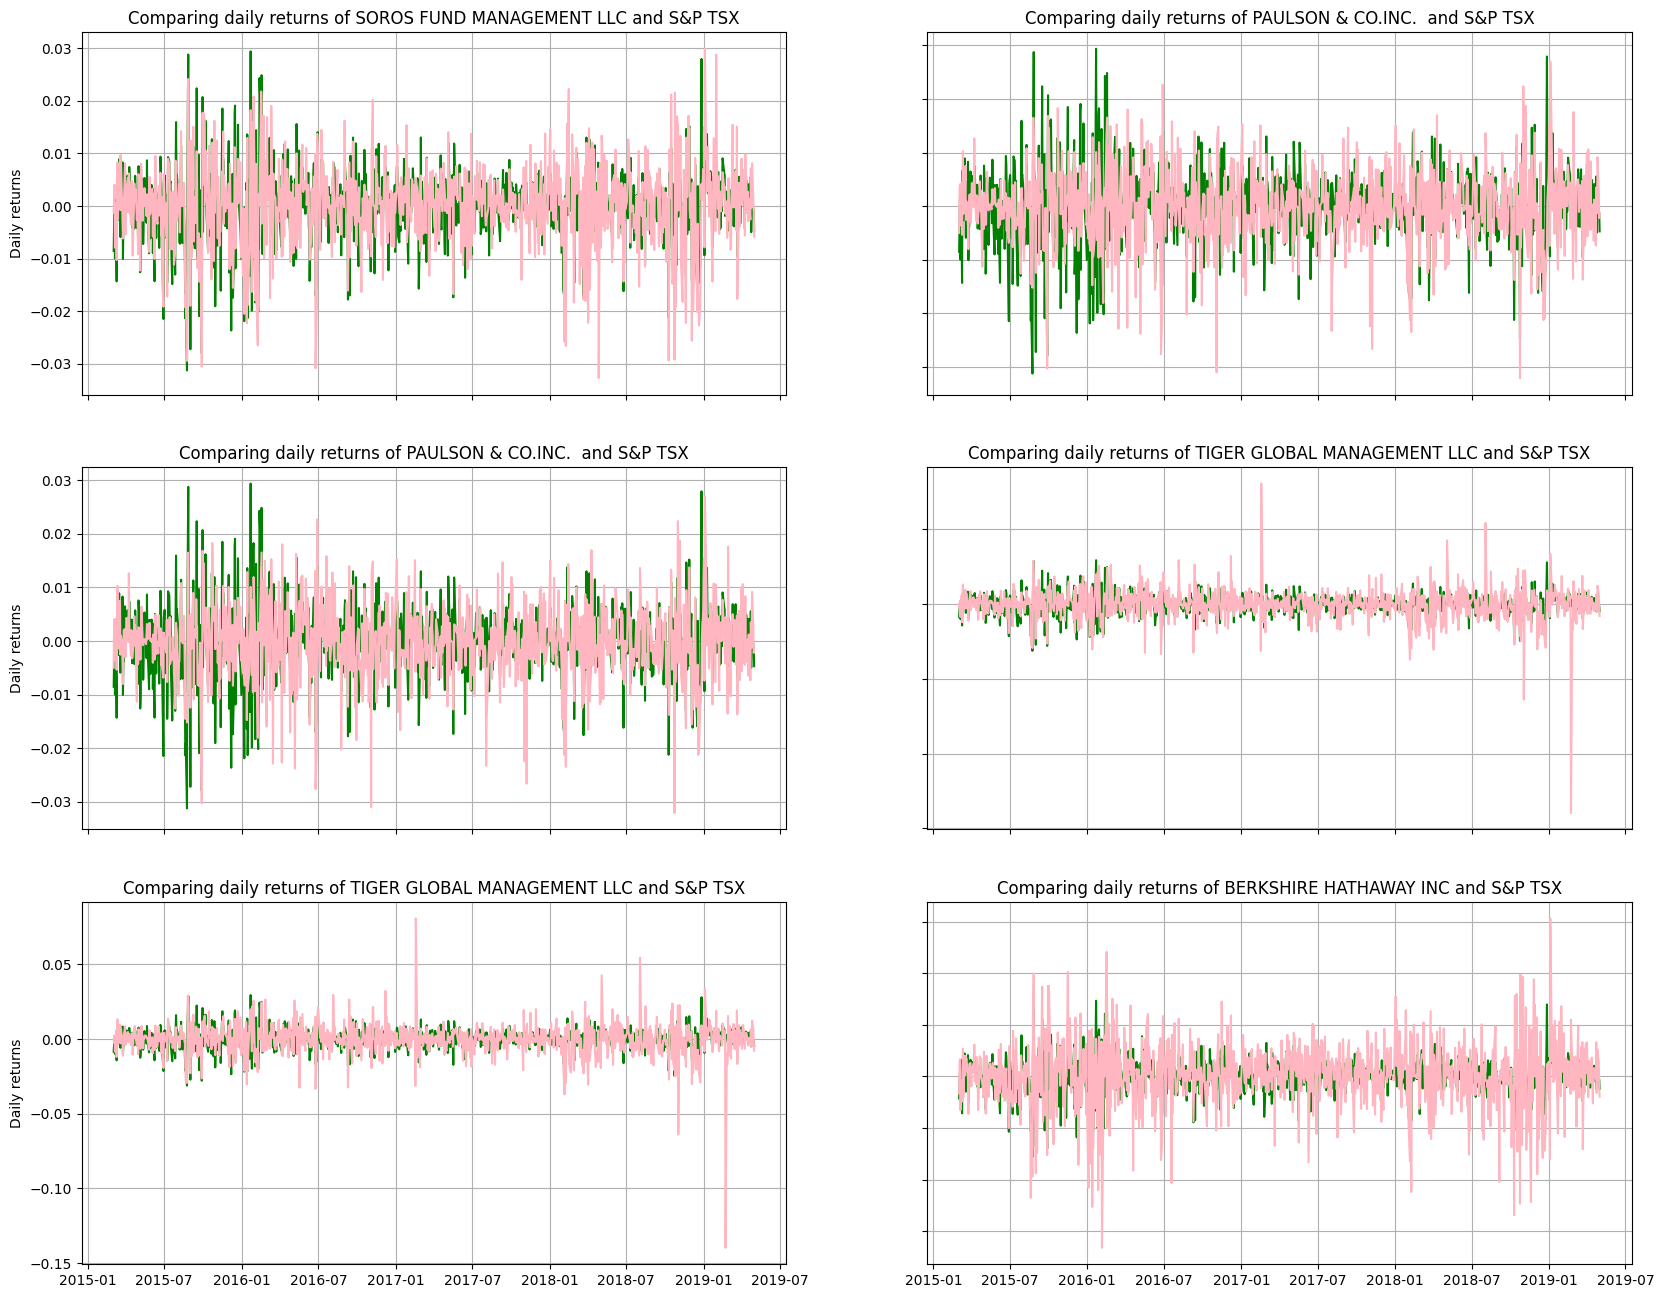

In [279]:
fig, axes = plt.subplots(3, 2, figsize=(20, 16))
columns = list(df.columns)
for row in range(3):
    for col in range(2):
        axes[row][col].plot(df.index, df['S&P TSX'], color='green')
        axes[row][col].plot(df.index, df[columns[row + col]], color='lightpink')
        axes[row][col].grid(True)
        axes[row][col].set_title(f'Comparing daily returns of {columns[row + col]} and S&P TSX')
        axes[row][col].set(ylabel='Daily returns')
        axes[row][col].label_outer()

#### Calculate and Plot cumulative returns.

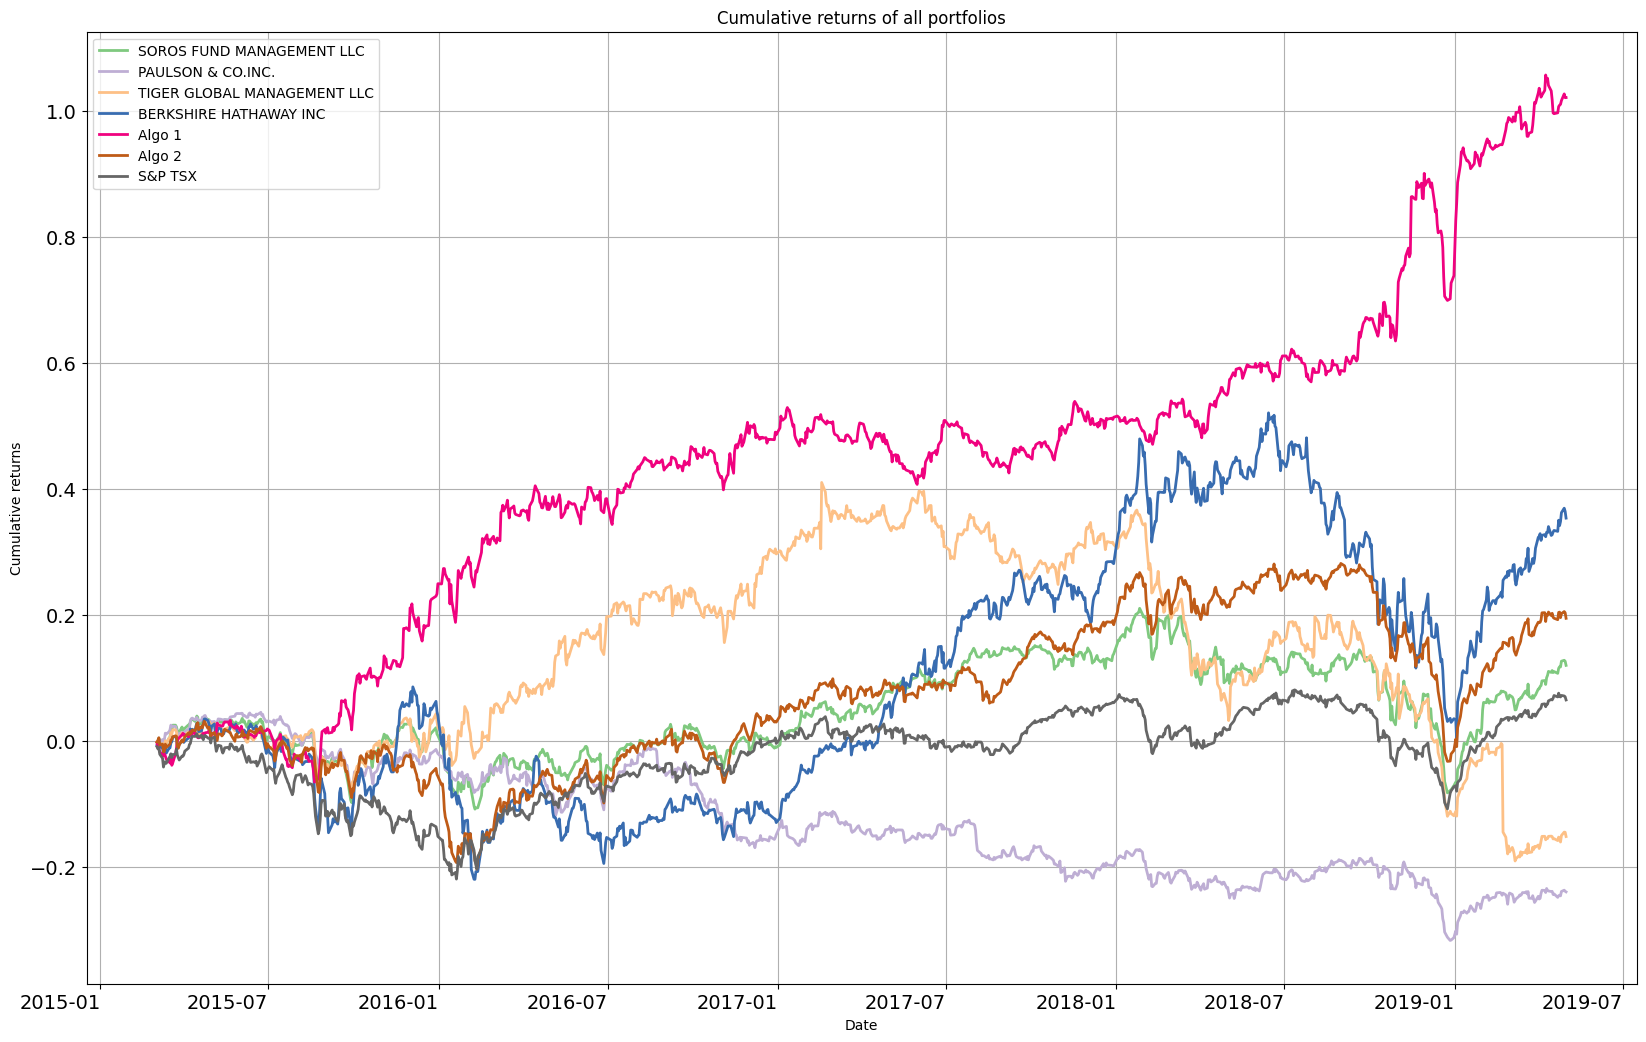

In [280]:
# Calculate cumulative returns of all portfolios
df_cumprod = (df + 1).cumprod() - 1
# Plot cumulative returns
df_cumprod.plot(
    figsize=(20, 14), grid=True,
    rot=0, title='Cumulative returns of all portfolios',
    xlabel='Date', ylabel='Cumulative returns', fontsize=14,
    linewidth=2, colormap='Accent'
);

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


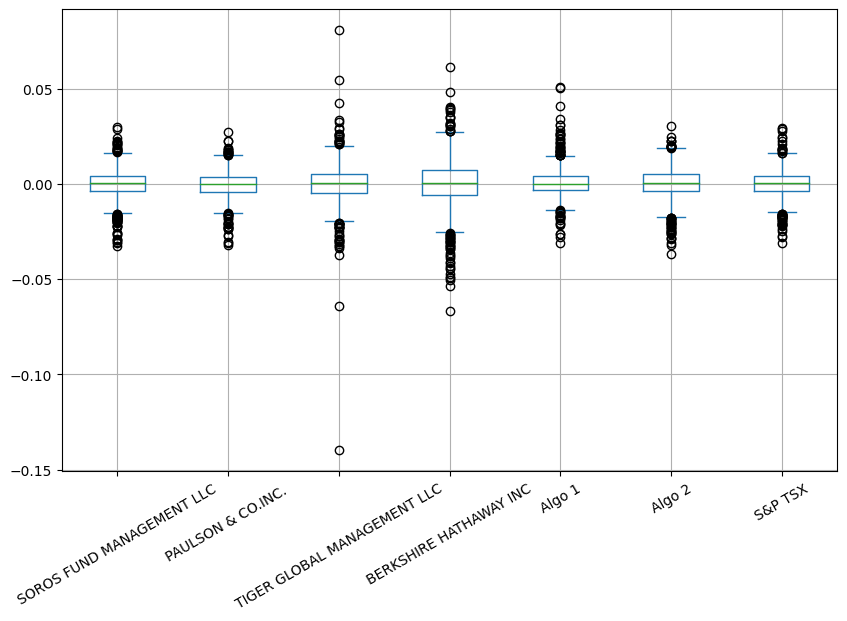

In [281]:
df.plot(
    kind="box", figsize = (10, 6),
    rot=30, grid=True
);

### Calculate Standard Deviations

In [282]:
# Calculate the daily standard deviations of all portfolios
df_std = pd.DataFrame(df.std()).rename(columns={0: 'std'})
df_std

,std
SOROS FUND MANAGEMENT LLC,0.007828
PAULSON & CO.INC.,0.006982
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326
S&P TSX,0.007034


### Determine which portfolios are riskier than the S&P TSX 60

In [283]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_std = df_std.loc['S&P TSX']['std']
# Determine which portfolios are riskier than the S&P TSX 60
print(*df_std[df_std['std'] > sp_std].index, sep='\n')

SOROS FUND MANAGEMENT LLC
TIGER GLOBAL MANAGEMENT LLC
BERKSHIRE HATHAWAY INC
Algo 1
Algo 2


### Calculate the Annualized Standard Deviation

In [284]:
# Calculate the annualized standard deviation (252 trading days)
df_std * np.sqrt(252)

,std
SOROS FUND MANAGEMENT LLC,0.124259
PAULSON & CO.INC.,0.110841
TIGER GLOBAL MANAGEMENT LLC,0.172759
BERKSHIRE HATHAWAY INC,0.203599
Algo 1,0.120470
Algo 2,0.132177
S&P TSX,0.111664


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

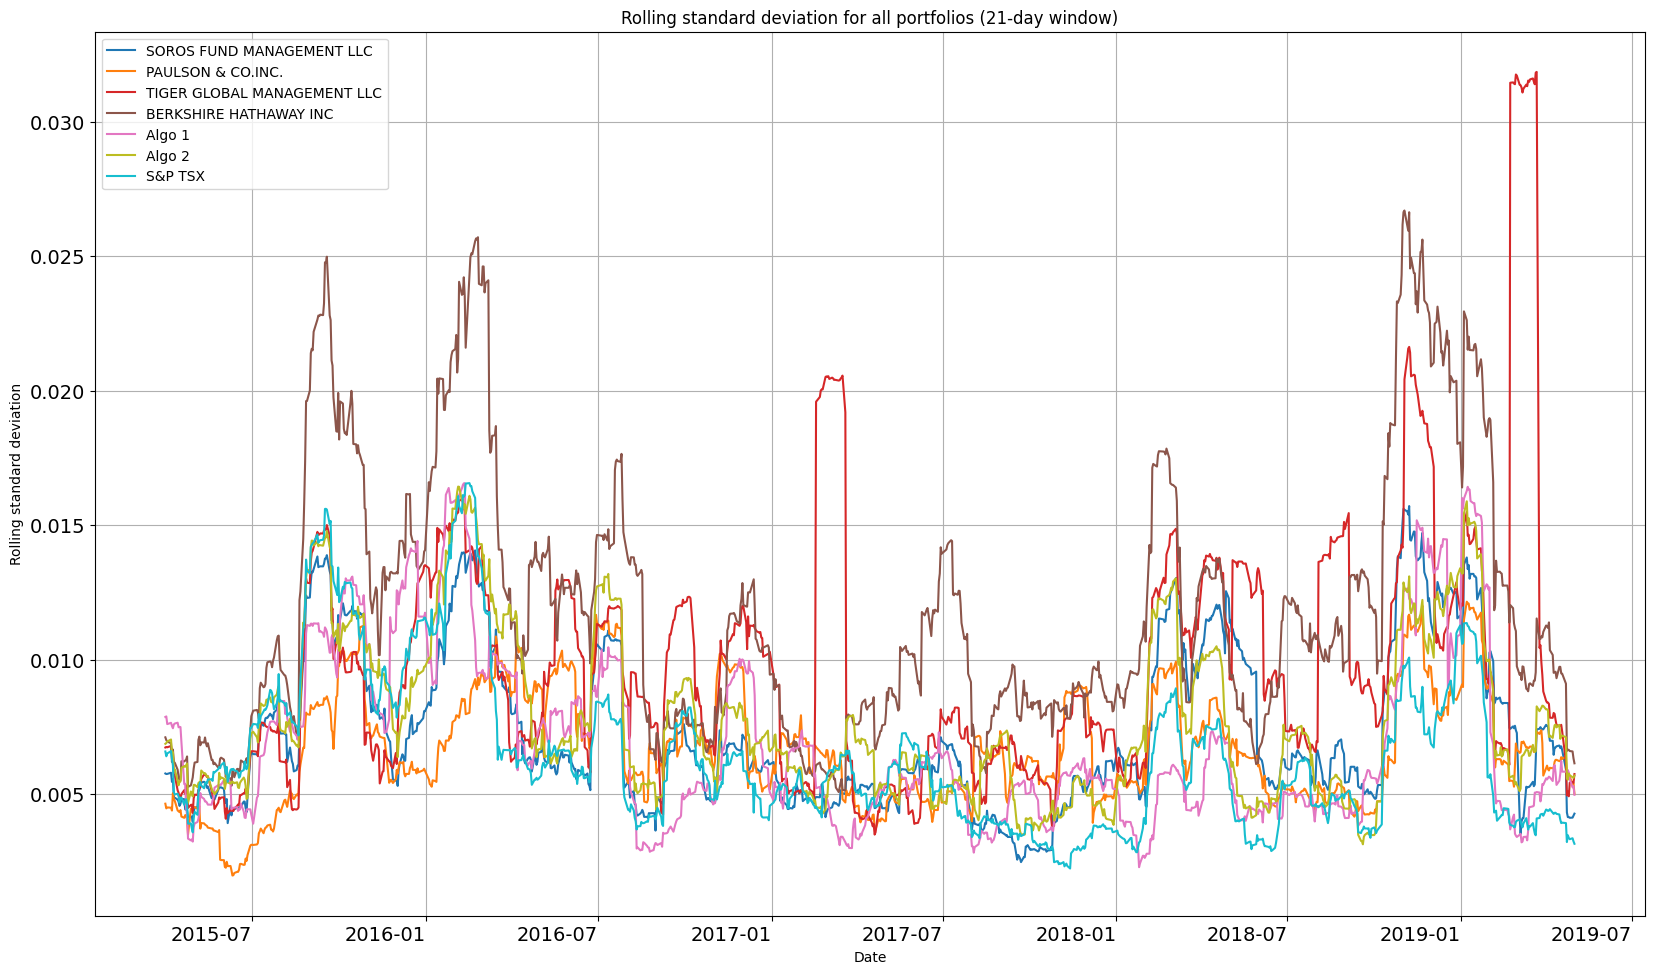

In [285]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
window_21 = df.rolling(window=21).std()
# Plot the rolling standard deviation
window_21.plot(
    figsize=(20, 13), grid=True,
    xlabel='Date', ylabel='Rolling standard deviation',
    title='Rolling standard deviation for all portfolios (21-day window)',
    fontsize=14, rot=0, colormap='tab10'
);

### Calculate and plot the correlation

In [286]:
# Calculate the correlation
corr_with_sp = pd.DataFrame(df.drop(columns=['S&P TSX']).corrwith(df['S&P TSX'])).rename(columns={0: 'correlation'})
# Display de correlation matrix
corr_with_sp

,correlation
SOROS FUND MANAGEMENT LLC,0.673930
PAULSON & CO.INC.,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.440583
BERKSHIRE HATHAWAY INC,0.557250
Algo 1,0.310276
Algo 2,0.737370


In [287]:
corr_with_sp.loc[corr_with_sp.idxmax()]

,correlation
Algo 2,0.73737


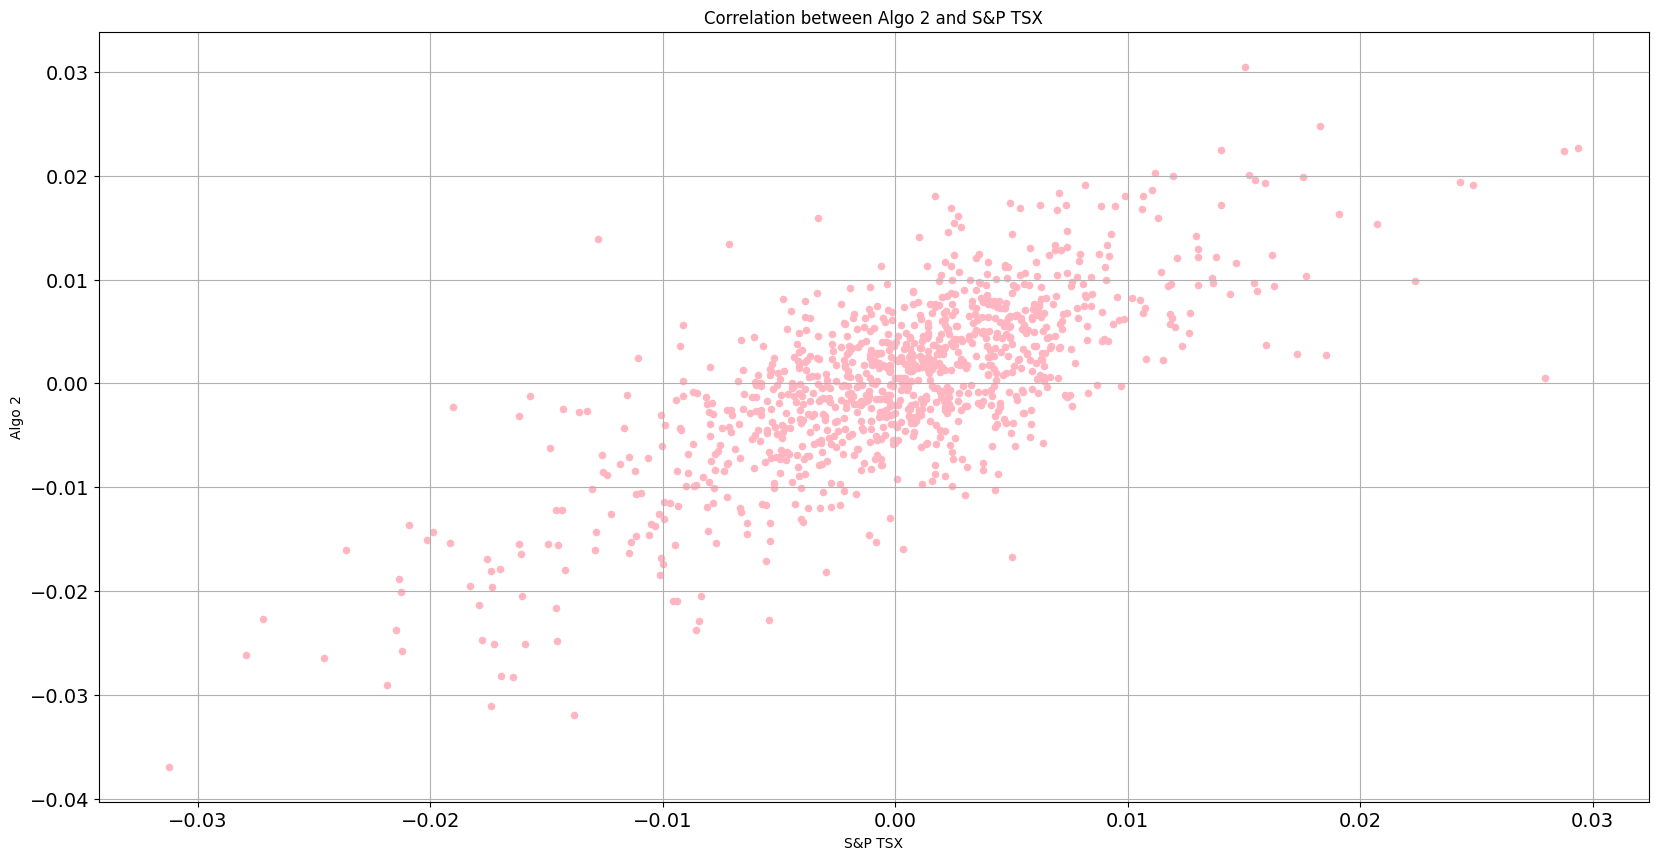

In [288]:
df.plot(
    kind="scatter", x = "S&P TSX", y = "Algo 2",
    figsize = (20,10), fontsize=14, color='lightpink',
    title='Correlation between Algo 2 and S&P TSX',
    grid=True
);

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

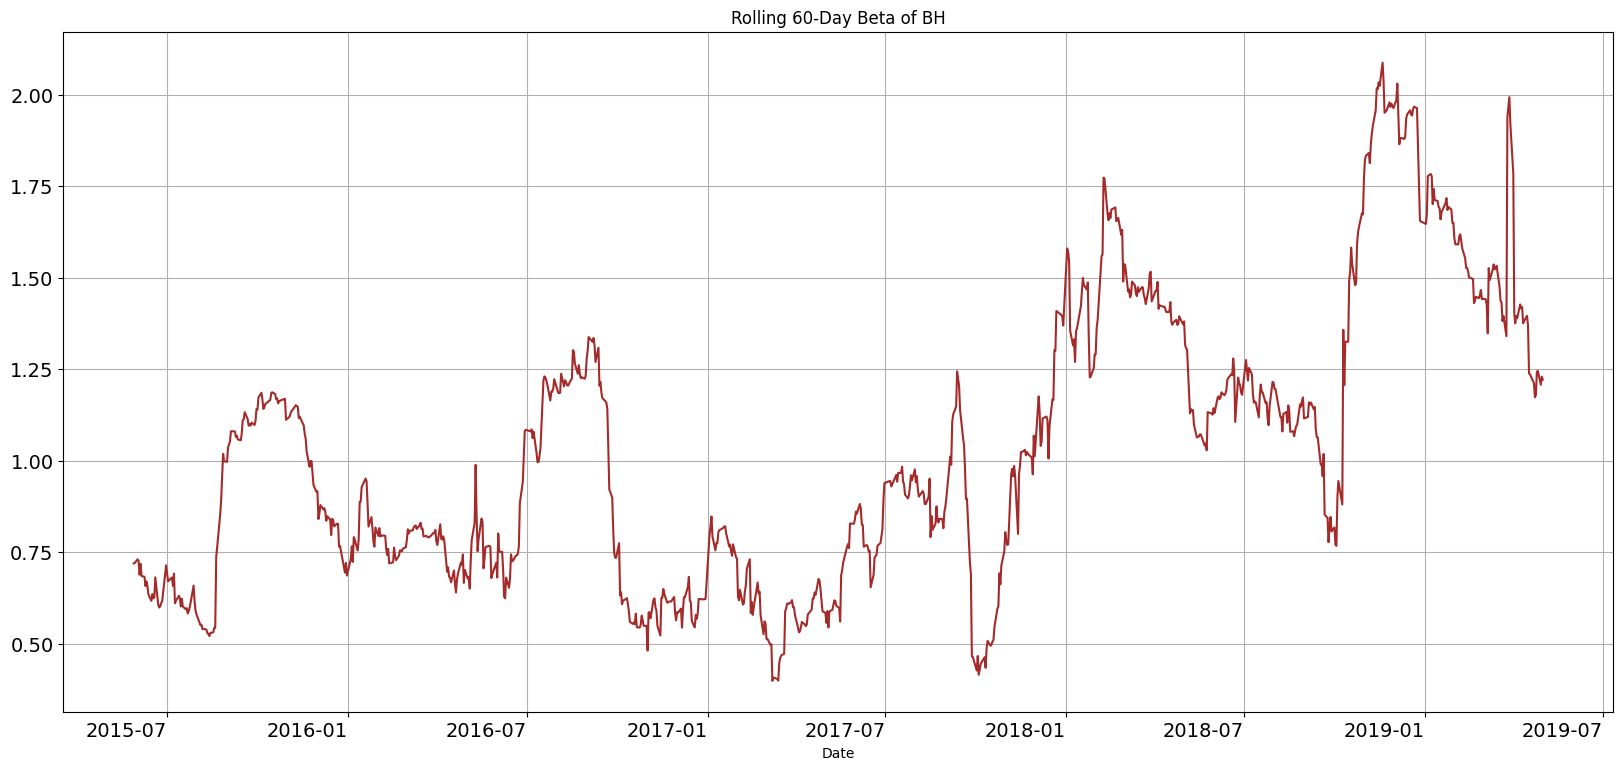

In [289]:
# Calculate covariance of a single portfolio
bh_cov = df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(df['S&P TSX'])
# Calculate variance of S&P TSX
sp_var = df['S&P TSX'].rolling(window=60).var()
# Computing beta
beta = bh_cov / sp_var
# Plot beta trend
beta.plot(
    figsize=(20, 10), title='Rolling 60-Day Beta of BH',
    grid=True, fontsize=14, rot=0, color='brown'
    
);

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

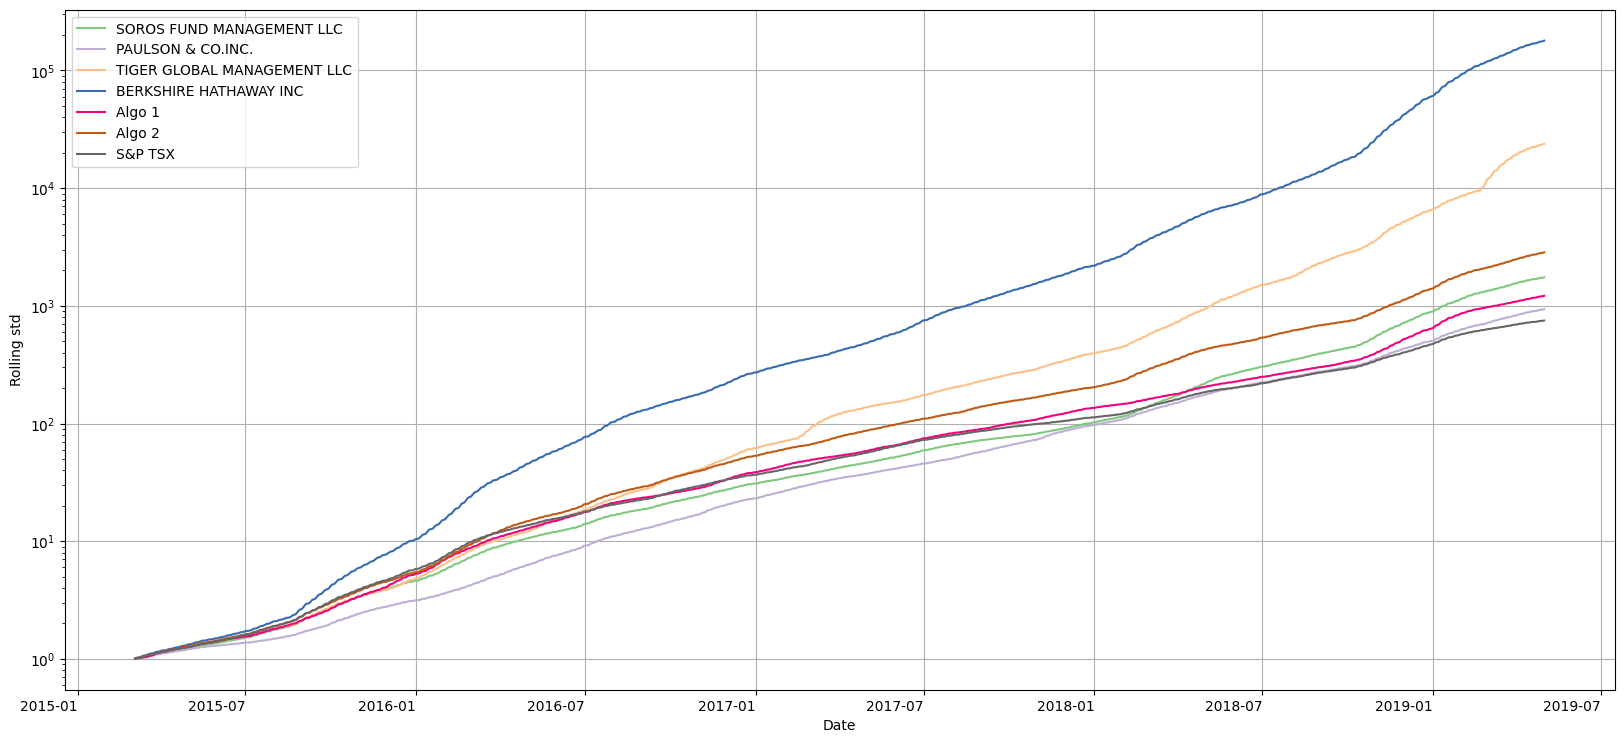

In [290]:
# Use `ewm` to calculate the rolling window
df_ewm = df.ewm(span=21).std()
(df_ewm + 1).cumprod().plot(
    figsize = (20,10), logy=True,
    grid=True, colormap='Accent',
    rot=0, ylabel='Rolling std'
);

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [291]:
# Annualized Sharpe Ratios
sharpe_ratios = (df.mean() * 252) / (df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX                        0.195550
dtype: float64

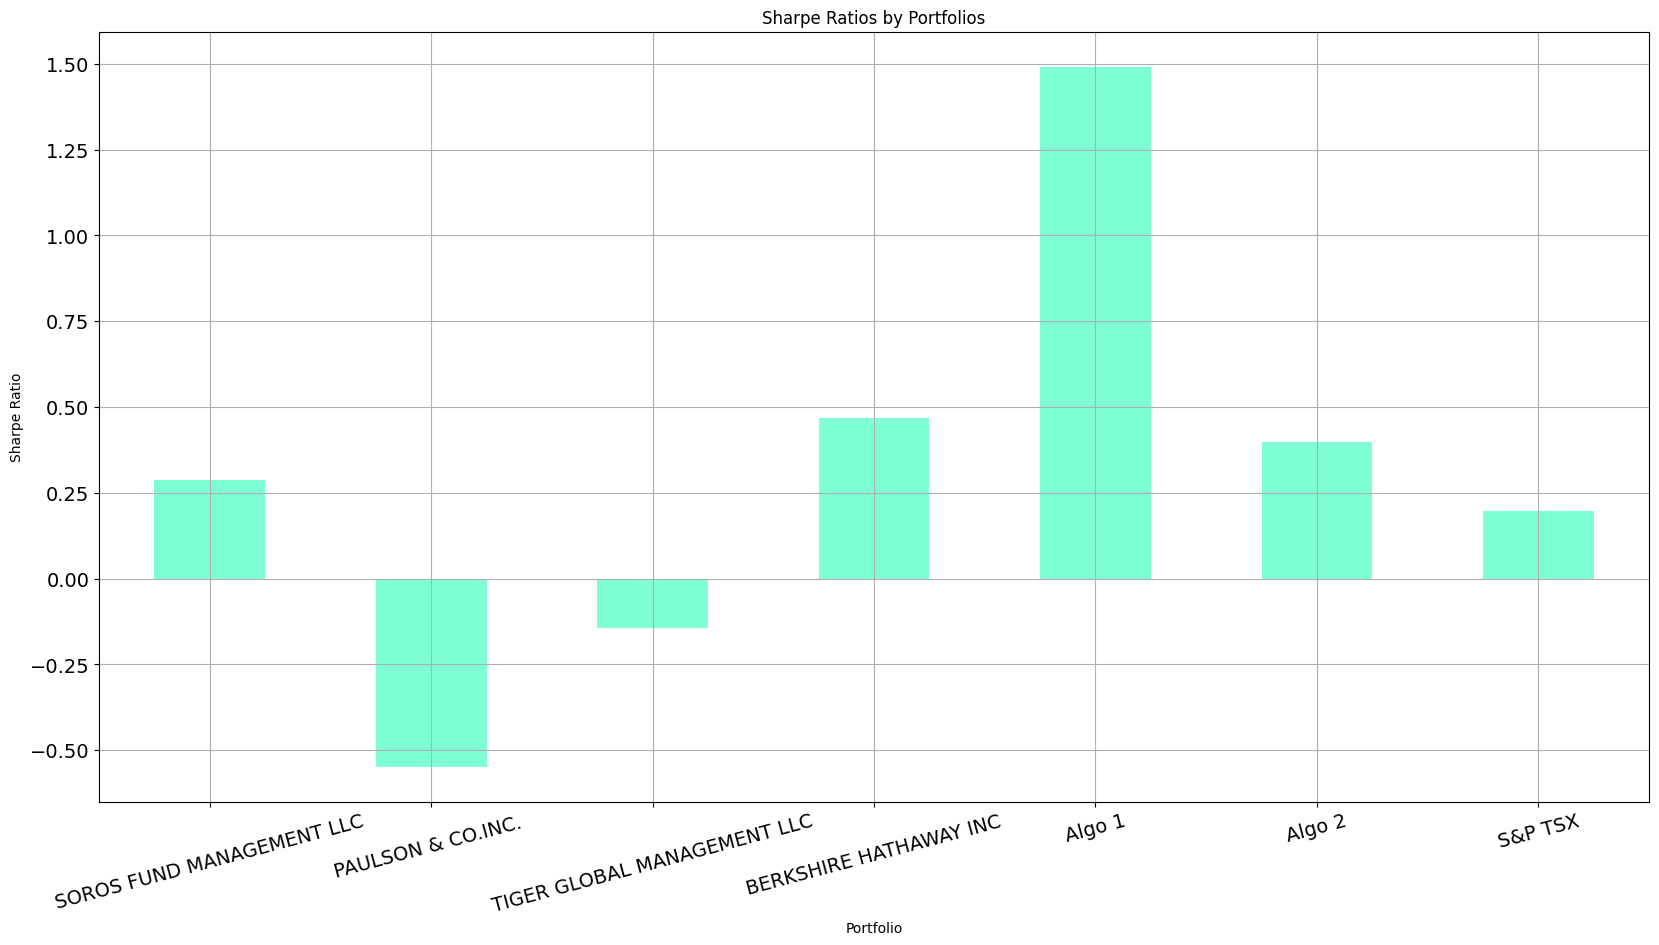

In [292]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(
    kind='bar', title='Sharpe Ratios by Portfolios',
    figsize=(20, 10), grid=True,
    xlabel='Portfolio', ylabel='Sharpe Ratio',
    fontsize=14, rot=15, color='aquamarine'
);

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [293]:
def prepare_df(filename):
    df = pd.read_csv(Path(f'Resources/{filename}'), decimal=',')
    df.rename(columns={'Close': filename.split('.csv')[0]}, inplace=True)
    df['Date'] = df['Date'].str.replace('16:00', '00:00')
    df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y %H:%M:%S')
    df.set_index('Date', inplace=True)
    df.sort_index(inplace=True)
    print(df.shape)
    return df

In [294]:
# Reading data from 1st stock
tesla_df = prepare_df('TSLA.csv').copy()
tesla_df.head(3)

(1049, 1)


,TSLA
Date,
2015-03-03,13.30
2015-03-04,13.50
2015-03-05,13.38


In [295]:
# Reading data from 2nd stock
pfizer_df = prepare_df('PFE.csv').copy()
pfizer_df.head(3)

(1049, 1)


,PFE
Date,
2015-03-03,32.74
2015-03-04,32.82
2015-03-05,32.65


In [296]:
# Reading data from 3rd stock
netflix_df = prepare_df('NFLX.csv').copy()
netflix_df.head(3)

(1049, 1)


,NFLX
Date,
2015-03-03,67.82
2015-03-04,67.11
2015-03-05,66.81


In [297]:
# Combine all stocks in a single DataFrame
my_df = pd.concat([tesla_df, pfizer_df, netflix_df], join='inner', axis=1)
print(my_df.shape)
my_df.sort_index(inplace=True)
my_df.head()

(1049, 3)


,TSLA,PFE,NFLX
Date,,,
2015-03-03,13.30,32.74,67.82
2015-03-04,13.50,32.82,67.11
2015-03-05,13.38,32.65,66.81
2015-03-06,12.93,32.18,64.87
2015-03-09,12.73,32.24,63.66


In [298]:
my_df.isnull().sum()

TSLA    0
PFE     0
NFLX    0
dtype: int64

In [299]:
my_df.dtypes

TSLA    float64
PFE     float64
NFLX    float64
dtype: object

In [301]:
# Calculate daily returns
my_df[['TSLA', 'PFE', 'NFLX']] = my_df.pct_change()
# Drop NAs
my_df.dropna(inplace=True)
# Display sample data
my_df.sample(5)

,TSLA,PFE,NFLX
Date,,,
2019-02-27,0.056395,-0.001963,-0.005754
2017-11-16,0.003855,0.005672,0.017645
2017-09-20,-0.003199,0.015188,-0.000916
2016-02-12,0.003988,0.007609,0.012160
2018-10-03,-0.020927,0.013368,-0.000239


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [302]:
# Set weights
weights = [1/3, 1/3, 1/3]
# Calculate portfolio return
weighted_returns = pd.DataFrame(my_df.dot(weights)).rename(columns={0: 'my_portfolio'})

# Display sample data
print(weighted_returns.shape)
weighted_returns.sample(3)

(1048, 1)


,my_portfolio
Date,
2016-09-19,-0.005853
2017-09-18,0.010548
2017-07-12,0.012522


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [303]:
# Join your returns DataFrame to the original returns DataFrame
df = pd.concat([df, weighted_returns], join='inner', axis=1)
print(df.shape)
df.head(3)

(1024, 8)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,my_portfolio
Date,,,,,,,,
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,0.002337
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,-0.006180
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,-0.025688


In [42]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# done! (concat with join inner)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [304]:
# Calculate the annualized `std`
df_std = pd.DataFrame(df.std()).rename(columns={0: 'std'})
df_std * np.sqrt(252)

,std
SOROS FUND MANAGEMENT LLC,0.124188
PAULSON & CO.INC.,0.110936
TIGER GLOBAL MANAGEMENT LLC,0.172566
BERKSHIRE HATHAWAY INC,0.203717
Algo 1,0.120699
Algo 2,0.132256
S&P TSX,0.111677
my_portfolio,0.253211


### Calculate and plot rolling `std` with 21-day window

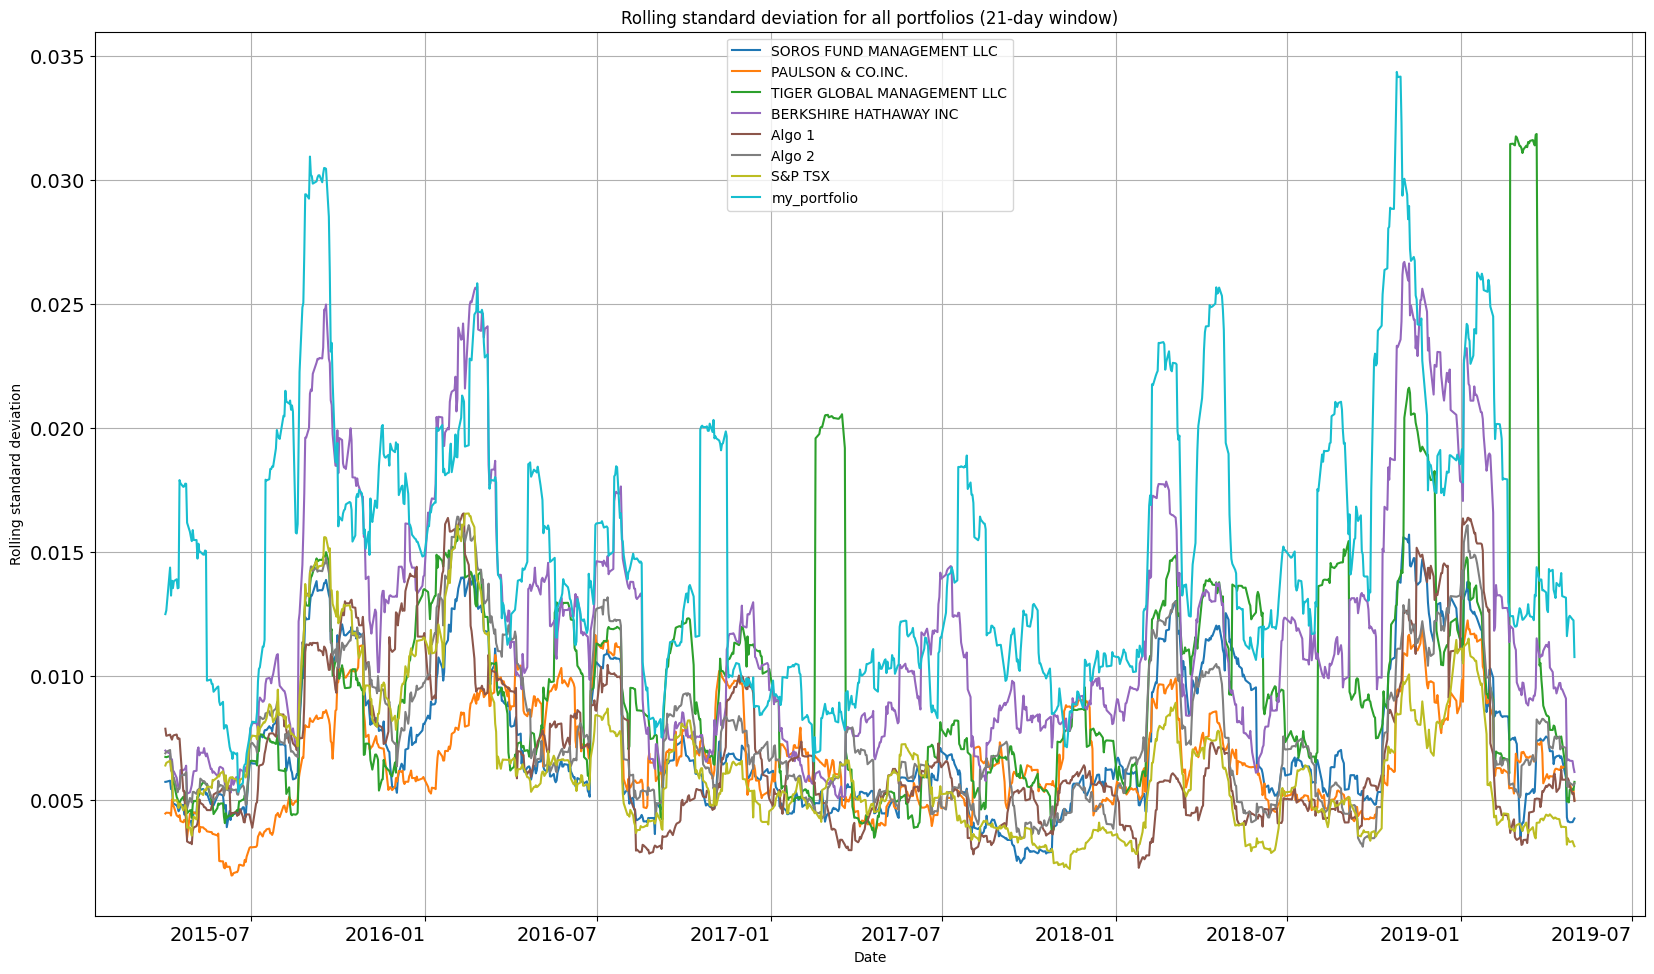

In [305]:
# Calculate rolling standard deviation
window_21 = df.rolling(window=21).std()
# Plot rolling standard deviation
window_21.plot(
    figsize=(20, 13), grid=True,
    xlabel='Date', ylabel='Rolling standard deviation',
    title='Rolling standard deviation for all portfolios (21-day window)',
    fontsize=14, rot=0, colormap='tab10'
);

### Calculate and plot the correlation

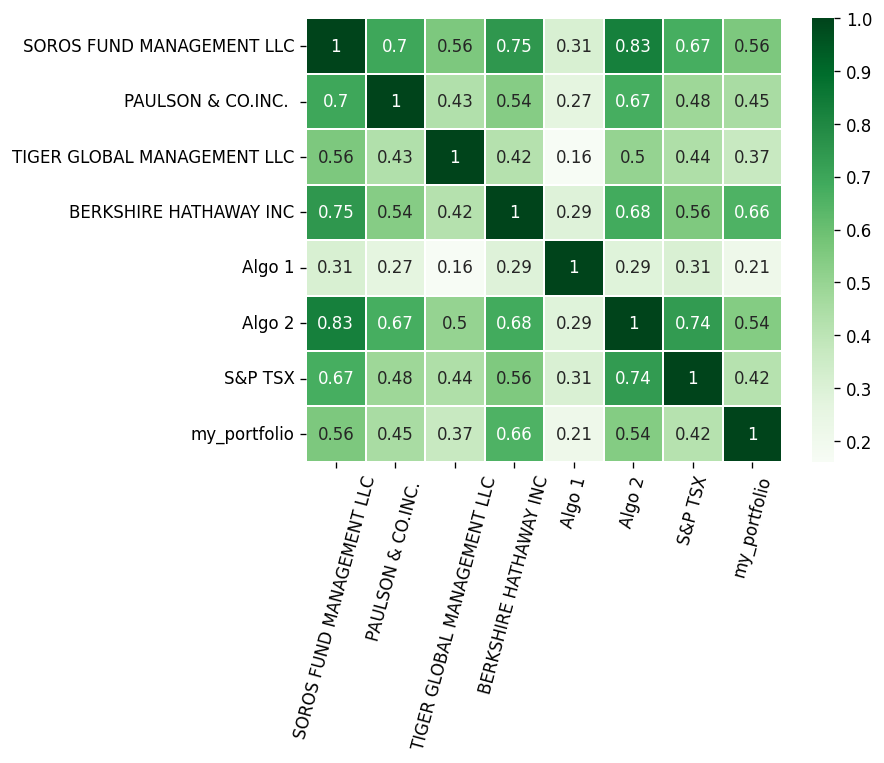

In [325]:
# Calculate and plot the correlation
plt.subplots(dpi=120) 
sns.heatmap(
    df.corr(),
    annot=True,
    cmap='Greens',
    linewidths=0.1
)
plt.xticks(rotation=75);

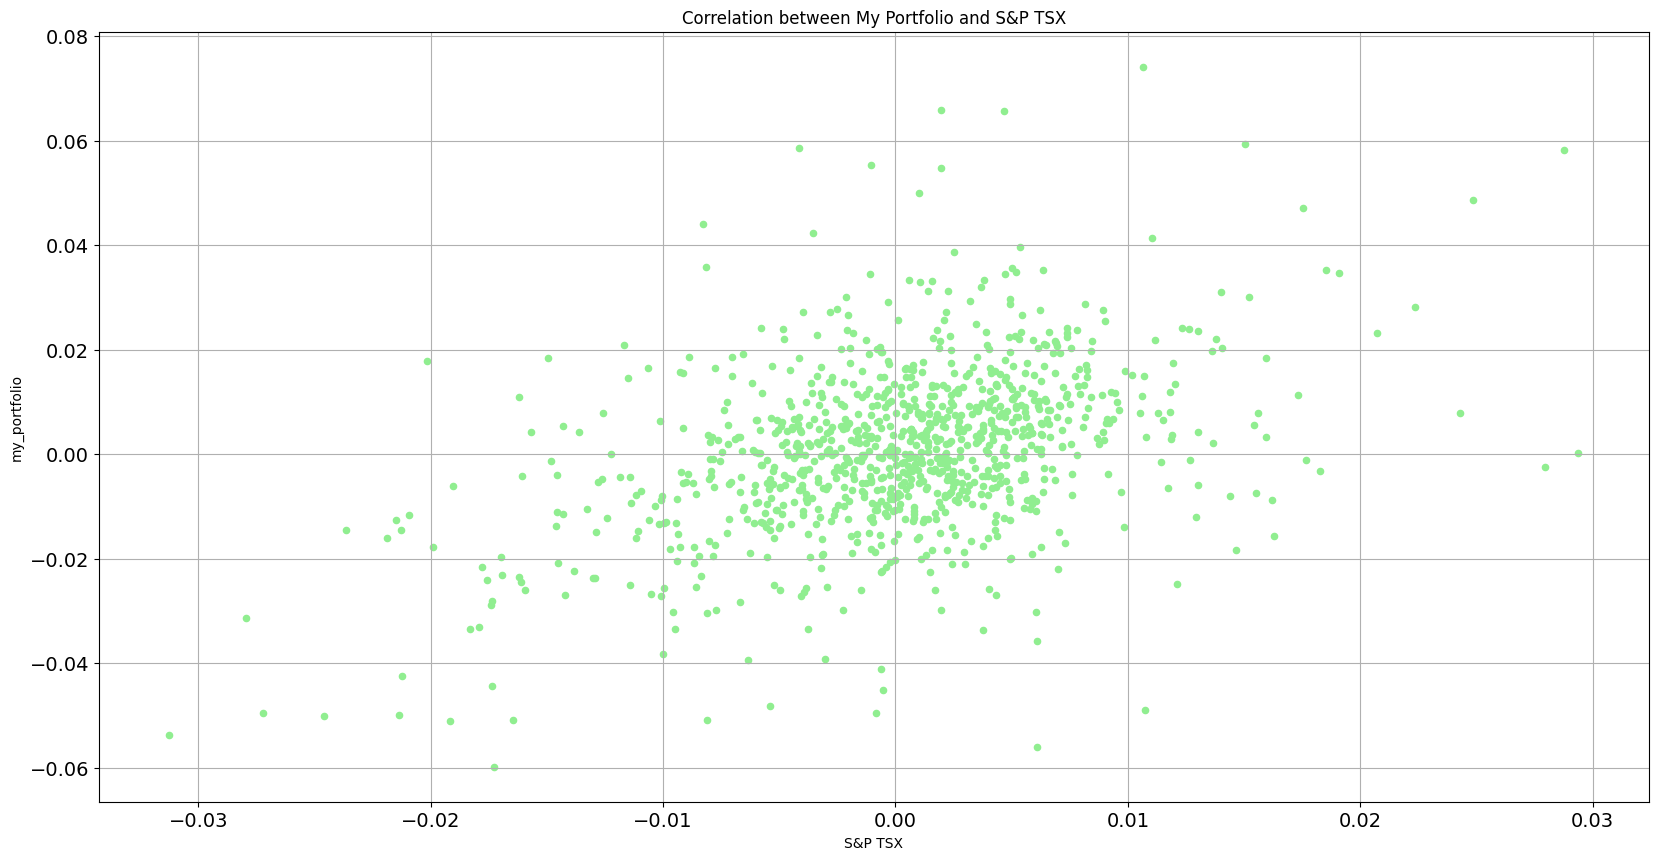

In [327]:
df.plot(
    kind='scatter', x = 'S&P TSX', y = 'my_portfolio',
    figsize = (20,10), fontsize=14, color='lightgreen',
    title='Correlation between My Portfolio and S&P TSX',
    grid=True
);

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

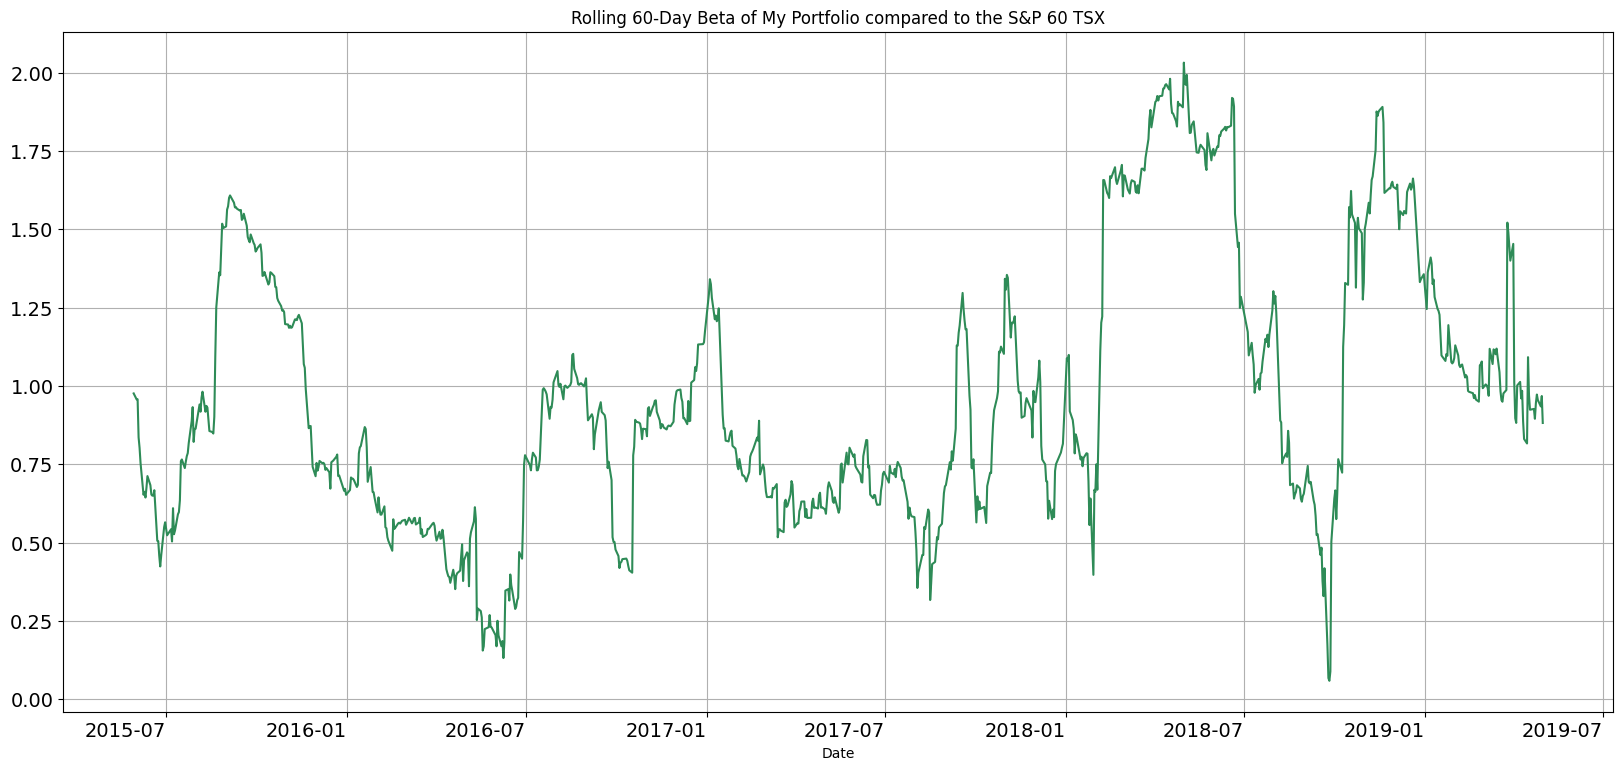

In [330]:
# Calculate and plot Beta
my_cov = df['my_portfolio'].rolling(window=60).cov(df['S&P TSX'])
sp_var = df['S&P TSX'].rolling(window=60).var()
# Computing beta
beta = my_cov / sp_var
# Plot beta trend
beta.plot(
    figsize=(20, 10), title='Rolling 60-Day Beta of My Portfolio compared to the S&P 60 TSX',
    grid=True, fontsize=14, rot=0, color='seagreen'
    
);

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [333]:
# Calculate Annualized Sharpe Ratios
days = len(df)
sharpe_ratios = (df.mean() * days) / (df.std() * np.sqrt(days))

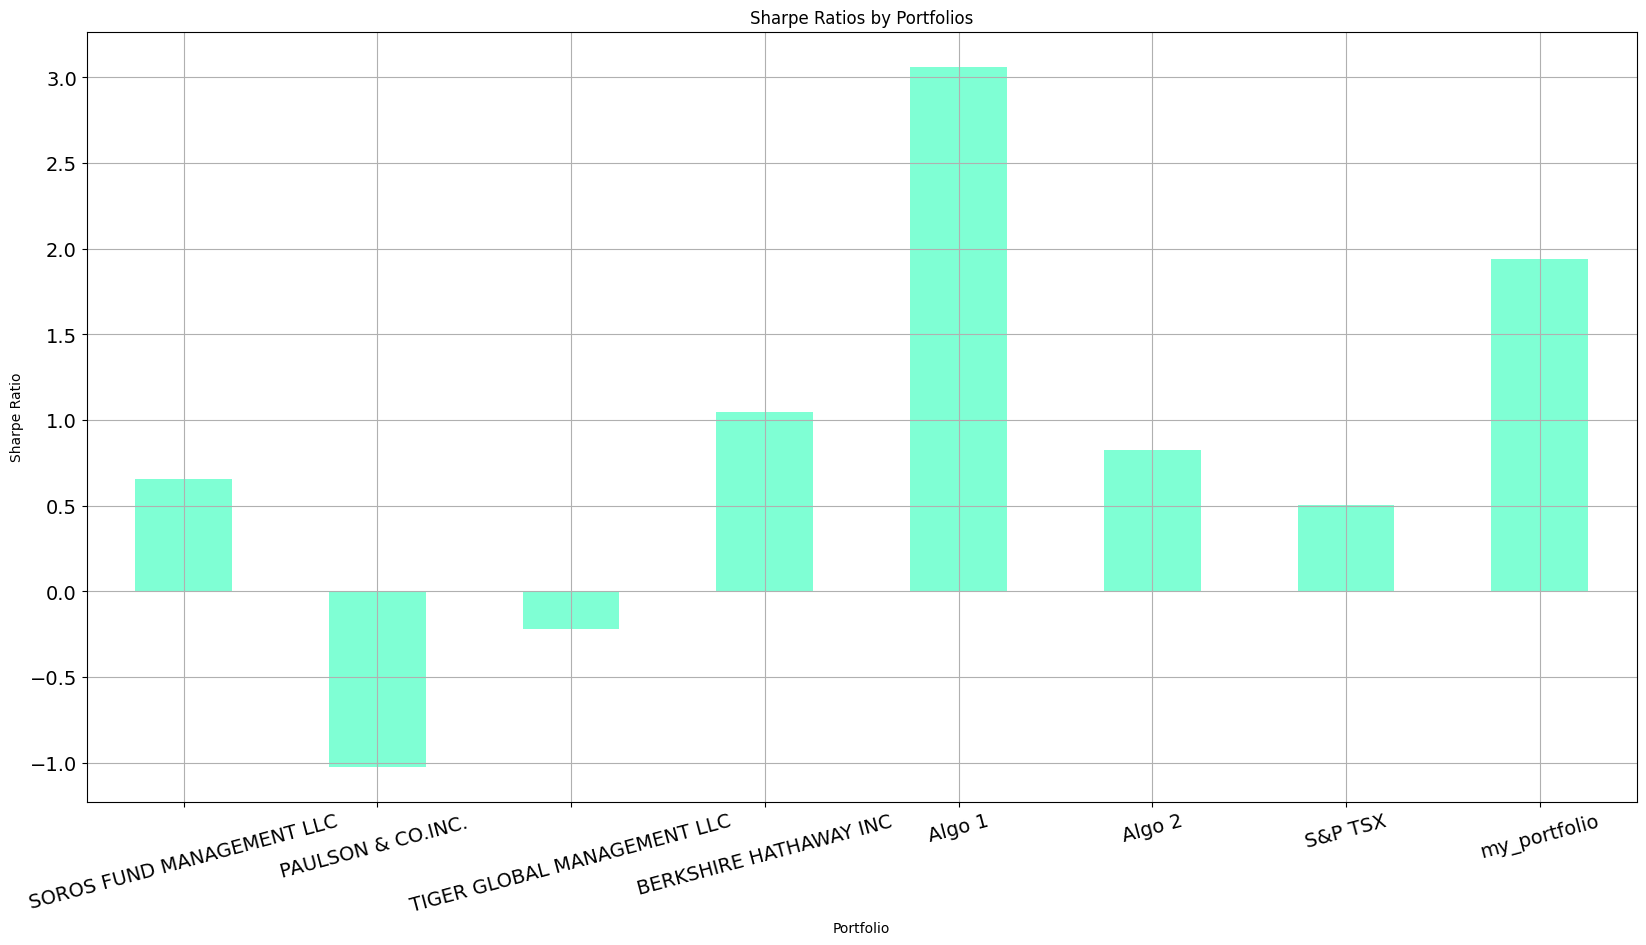

In [334]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(
    kind='bar', title='Sharpe Ratios by Portfolios',
    figsize=(20, 10), grid=True,
    xlabel='Portfolio', ylabel='Sharpe Ratio',
    fontsize=14, rot=15, color='aquamarine'
);

### How does your portfolio do?

Write your answer here!